In [0]:
import os
import matplotlib.pyplot as plt
%tensorflow_version 2.x

%matplotlib inline
from tensorflow.python.keras.layers import Add, BatchNormalization, Conv2D, Dense, Flatten, Input, LeakyReLU, PReLU, Lambda
from tensorflow.python.keras.models import Model


TensorFlow 2.x selected.


In [0]:
LR_SIZE = 24
HR_SIZE = 96
def normalize(x, rgb_mean=DIV2K_RGB_MEAN):
    return (x - rgb_mean) / 127.5


def denormalize(x, rgb_mean=DIV2K_RGB_MEAN):
    return x * 127.5 + rgb_mean


def normalize_01(x):
    """Normalizes RGB images to [0, 1]."""
    return x / 255.0


def normalize_m11(x):
    """Normalizes RGB images to [-1, 1]."""
    return x / 127.5 - 1


def denormalize_m11(x):
    """Inverse of normalize_m11."""
    return (x + 1) * 127.5

In [0]:
def upsample(x_in, num_filters):
    x = Conv2D(num_filters, kernel_size=3, padding='same')(x_in)
    x = Lambda(pixel_shuffle(scale=2))(x)
    return PReLU(shared_axes=[1, 2])(x)


def res_block(x_in, num_filters, momentum=0.8):
    x = Conv2D(num_filters, kernel_size=3, padding='same')(x_in)
    x = BatchNormalization(momentum=momentum)(x)
    x = PReLU(shared_axes=[1, 2])(x)
    x = Conv2D(num_filters, kernel_size=3, padding='same')(x)
    x = BatchNormalization(momentum=momentum)(x)
    x = Add()([x_in, x])
    return x


def sr_resnet(num_filters=64, num_res_blocks=16):
    x_in = Input(shape=(None, None, 3))
    x = Lambda(normalize_01)(x_in)

    x = Conv2D(num_filters, kernel_size=9, padding='same')(x)
    x = x_1 = PReLU(shared_axes=[1, 2])(x)

    for _ in range(num_res_blocks):
        x = res_block(x, num_filters)

    x = Conv2D(num_filters, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x_1, x])

    x = upsample(x, num_filters * 4)
    x = upsample(x, num_filters * 4)

    x = Conv2D(3, kernel_size=9, padding='same', activation='tanh')(x)
    x = Lambda(denormalize_m11)(x)

    return Model(x_in, x)


generator = sr_resnet


In [0]:
import numpy as np
import tensorflow as tf


DIV2K_RGB_MEAN = np.array([0.4488, 0.4371, 0.4040]) * 255


def resolve_single(model, lr):
    return resolve(model, tf.expand_dims(lr, axis=0))[0]


def resolve(model, lr_batch):
    lr_batch = tf.cast(lr_batch, tf.float32)
    sr_batch = model(lr_batch)
    sr_batch = tf.clip_by_value(sr_batch, 0, 255)
    sr_batch = tf.round(sr_batch)
    sr_batch = tf.cast(sr_batch, tf.uint8)
    return sr_batch


def pixel_shuffle(scale):
    return lambda x: tf.nn.depth_to_space(x, scale)

In [0]:
pre_generator = generator()

In [0]:
pre_generator.load_weights('/content/gan_generator.h5')

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image


def load_image(path):
    return np.array(Image.open(path))


def plot_sample(lr, sr):
    plt.figure(figsize=(20, 10))

    images = [lr, sr]
    titles = ['LR', f'SR (x{sr.shape[0] // lr.shape[0]})']

    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, 2, i+1)
        plt.imshow(img)
        plt.title(title)
        plt.xticks([])
        plt.yticks([])

In [0]:
def resolve_single(model, lr):
    return resolve(model, tf.expand_dims(lr, axis=0))[0]


def resolve(model, lr_batch):
    lr_batch = tf.cast(lr_batch, tf.float32)
    sr_batch = model(lr_batch)
    sr_batch = tf.clip_by_value(sr_batch, 0, 255)
    sr_batch = tf.round(sr_batch)
    sr_batch = tf.cast(sr_batch, tf.uint8)
    return sr_batch

In [0]:
def resolve_and_plot(lr_image_path):
    lr = load_image(lr_image_path)
    
    pre_sr = resolve_single(pre_generator, lr)
   # gan_sr = resolve_single(gan_generator, lr)
    
    plt.figure(figsize=(20, 20))
    
    images = [ pre_sr,lr]
   # im.append(pre_sr)

    titles = ['HR','LR']
    positions = [1, 3]
    
    for i, (img, title) in enumerate(zip(images, titles)):
        img=np.array(img)
        print(img.shape)
        
        plt.savefig("/content/drive/My Drive/HR_Images/abc.jpg")
        plt.subplot(2, 2, i)
        plt.imshow(img)
        plt.title(title)
        plt.xticks([])
        plt.yticks([])

In [0]:
import os
files_test = []


  
test_folder = "/content/drive/My Drive/Test Images"
for sub_folder in os.listdir(test_folder):
  #prilennt(sub_folder)
  files_test.append(sub_folder) 
    #path, dirs, files = next(os.walk(os.path.join(train_folder,sub_folder)))
    #files_train += len(files)

In [0]:
len(files_test)

3250

In [0]:
for i in range(len(files_train)):
  nm=files_train[i].split('.')
  #print(nm[0])

In [0]:
def resolve_and_plot(lr_image_path):
    lr = load_image(lr_image_path)
    
    pre_sr = resolve_single(pre_generator, lr)
    
    images = pre_sr
    
    return images

In [0]:
from tqdm import tqdm

In [0]:
for i in tqdm(range(len(files_test))):
  try:
    LR='/content/drive/My Drive/Test Images/'+files_test[i]
    HR=resolve_and_plot(LR)
    images = np.array(HR)
  
    nm=files_test[i].split('.')


    plt.imsave('/content/drive/My Drive/Test_HR_Images/'+str(nm[0])+'.jpg',images)

  except:
    print("go ahead")


  2%|▏         | 60/3250 [00:32<20:53,  2.55it/s]

  2%|▏         | 61/3250 [00:32<19:57,  2.66it/s]

go ahead


  3%|▎         | 103/3250 [01:02<34:01,  1.54it/s]

  3%|▎         | 104/3250 [01:02<26:48,  1.96it/s]

go ahead


  7%|▋         | 223/3250 [01:50<16:33,  3.05it/s]

  7%|▋         | 224/3250 [01:50<14:37,  3.45it/s]

go ahead


 11%|█▏        | 371/3250 [02:47<19:10,  2.50it/s]

 11%|█▏        | 372/3250 [02:47<16:43,  2.87it/s]

go ahead


 13%|█▎        | 407/3250 [03:01<21:34,  2.20it/s]

 13%|█▎        | 408/3250 [03:01<18:26,  2.57it/s]

go ahead


 13%|█▎        | 430/3250 [03:09<21:00,  2.24it/s]

 13%|█▎        | 431/3250 [03:09<17:13,  2.73it/s]

go ahead


 14%|█▎        | 440/3250 [03:14<25:22,  1.85it/s]

go ahead


 17%|█▋        | 549/3250 [03:55<17:47,  2.53it/s]

 17%|█▋        | 550/3250 [03:56<18:19,  2.46it/s]

go ahead


 20%|██        | 660/3250 [04:39<12:29,  3.46it/s]

 20%|██        | 661/3250 [04:39<11:02,  3.91it/s]

go ahead


 21%|██▏       | 694/3250 [04:51<12:58,  3.28it/s]

 21%|██▏       | 695/3250 [04:51<13:04,  3.26it/s]

go ahead


 26%|██▌       | 831/3250 [05:40<21:17,  1.89it/s]

 26%|██▌       | 832/3250 [05:40<17:21,  2.32it/s]

go ahead


 30%|██▉       | 969/3250 [06:30<14:43,  2.58it/s]

 30%|██▉       | 970/3250 [06:30<13:31,  2.81it/s]

go ahead


 32%|███▏      | 1043/3250 [06:59<11:29,  3.20it/s]

 32%|███▏      | 1044/3250 [07:00<14:09,  2.60it/s]

go ahead


 32%|███▏      | 1049/3250 [07:02<12:58,  2.83it/s]

 32%|███▏      | 1050/3250 [07:02<12:28,  2.94it/s]

go ahead


 32%|███▏      | 1051/3250 [07:02<11:56,  3.07it/s]

 32%|███▏      | 1052/3250 [07:02<10:53,  3.36it/s]

go ahead


 33%|███▎      | 1059/3250 [07:05<14:28,  2.52it/s]

 33%|███▎      | 1060/3250 [07:05<12:29,  2.92it/s]

go ahead


 37%|███▋      | 1196/3250 [07:54<11:48,  2.90it/s]

 37%|███▋      | 1197/3250 [07:55<10:47,  3.17it/s]

go ahead


 42%|████▏     | 1349/3250 [08:53<09:59,  3.17it/s]

 42%|████▏     | 1350/3250 [08:53<08:46,  3.61it/s]

go ahead


 43%|████▎     | 1397/3250 [09:10<10:54,  2.83it/s]

 43%|████▎     | 1398/3250 [09:10<09:54,  3.11it/s]

go ahead


 46%|████▌     | 1501/3250 [09:49<11:36,  2.51it/s]

 46%|████▌     | 1502/3250 [09:50<10:06,  2.88it/s]

go ahead


 47%|████▋     | 1518/3250 [09:55<10:48,  2.67it/s]

 47%|████▋     | 1519/3250 [09:56<13:29,  2.14it/s]

go ahead


 47%|████▋     | 1535/3250 [10:01<11:10,  2.56it/s]

 47%|████▋     | 1536/3250 [10:02<12:31,  2.28it/s]

go ahead


 48%|████▊     | 1556/3250 [10:08<08:31,  3.31it/s]

 48%|████▊     | 1557/3250 [10:08<08:10,  3.45it/s]

go ahead


 50%|████▉     | 1616/3250 [10:30<09:25,  2.89it/s]

 50%|████▉     | 1617/3250 [10:30<08:17,  3.28it/s]

go ahead


 51%|█████     | 1659/3250 [10:45<08:41,  3.05it/s]

 51%|█████     | 1660/3250 [10:45<07:31,  3.52it/s]

go ahead


 52%|█████▏    | 1700/3250 [11:00<09:43,  2.66it/s]

 52%|█████▏    | 1701/3250 [11:00<08:16,  3.12it/s]

go ahead


 52%|█████▏    | 1705/3250 [11:01<08:39,  2.97it/s]

 52%|█████▏    | 1706/3250 [11:02<07:54,  3.26it/s]

go ahead


 57%|█████▋    | 1837/3250 [11:53<09:27,  2.49it/s]

 57%|█████▋    | 1838/3250 [11:53<10:45,  2.19it/s]

go ahead


 64%|██████▍   | 2072/3250 [13:31<08:07,  2.42it/s]

 64%|██████▍   | 2073/3250 [13:31<07:19,  2.68it/s]

go ahead


 68%|██████▊   | 2218/3250 [14:25<06:00,  2.87it/s]

 68%|██████▊   | 2219/3250 [14:25<05:19,  3.23it/s]

go ahead


 71%|███████   | 2310/3250 [15:02<05:23,  2.90it/s]

 71%|███████   | 2311/3250 [15:02<04:58,  3.15it/s]

go ahead


 72%|███████▏  | 2341/3250 [15:13<05:03,  2.99it/s]

 72%|███████▏  | 2342/3250 [15:13<04:32,  3.33it/s]

go ahead


 73%|███████▎  | 2359/3250 [15:18<04:35,  3.23it/s]

 73%|███████▎  | 2360/3250 [15:19<05:57,  2.49it/s]

go ahead


 74%|███████▍  | 2417/3250 [15:40<04:54,  2.83it/s]

 74%|███████▍  | 2418/3250 [15:40<04:37,  3.00it/s]

go ahead


 75%|███████▍  | 2429/3250 [15:44<04:06,  3.33it/s]

 75%|███████▍  | 2430/3250 [15:45<04:28,  3.05it/s]

go ahead


 76%|███████▌  | 2477/3250 [16:01<03:54,  3.30it/s]

 76%|███████▌  | 2478/3250 [16:02<03:37,  3.55it/s]

go ahead


 77%|███████▋  | 2502/3250 [16:11<04:51,  2.57it/s]

 77%|███████▋  | 2503/3250 [16:11<04:17,  2.90it/s]

go ahead


 80%|███████▉  | 2591/3250 [16:42<03:37,  3.03it/s]

 80%|███████▉  | 2592/3250 [16:42<03:17,  3.34it/s]

go ahead


 81%|████████  | 2624/3250 [16:53<03:51,  2.70it/s]

 81%|████████  | 2625/3250 [16:54<03:17,  3.16it/s]

go ahead


 88%|████████▊ | 2860/3250 [18:31<01:59,  3.27it/s]

 88%|████████▊ | 2861/3250 [18:32<01:59,  3.26it/s]

go ahead


 88%|████████▊ | 2871/3250 [18:36<02:23,  2.64it/s]

 88%|████████▊ | 2872/3250 [18:36<02:13,  2.84it/s]

go ahead


 91%|█████████▏| 2971/3250 [19:19<01:44,  2.68it/s]

 91%|█████████▏| 2972/3250 [19:19<01:31,  3.04it/s]

go ahead


 94%|█████████▍| 3066/3250 [19:54<01:00,  3.06it/s]

 94%|█████████▍| 3067/3250 [19:54<00:57,  3.21it/s]

go ahead


 95%|█████████▍| 3084/3250 [20:00<01:16,  2.16it/s]

 95%|█████████▍| 3085/3250 [20:00<01:06,  2.48it/s]

go ahead


 95%|█████████▌| 3095/3250 [20:05<00:55,  2.79it/s]

 95%|█████████▌| 3096/3250 [20:05<00:48,  3.20it/s]

go ahead


 99%|█████████▉| 3231/3250 [20:57<00:12,  1.53it/s]

 99%|█████████▉| 3232/3250 [20:57<00:10,  1.80it/s]

go ahead


100%|██████████| 3250/3250 [21:06<00:00,  1.88it/s]


(112, 80, 3)
(448, 320, 3)


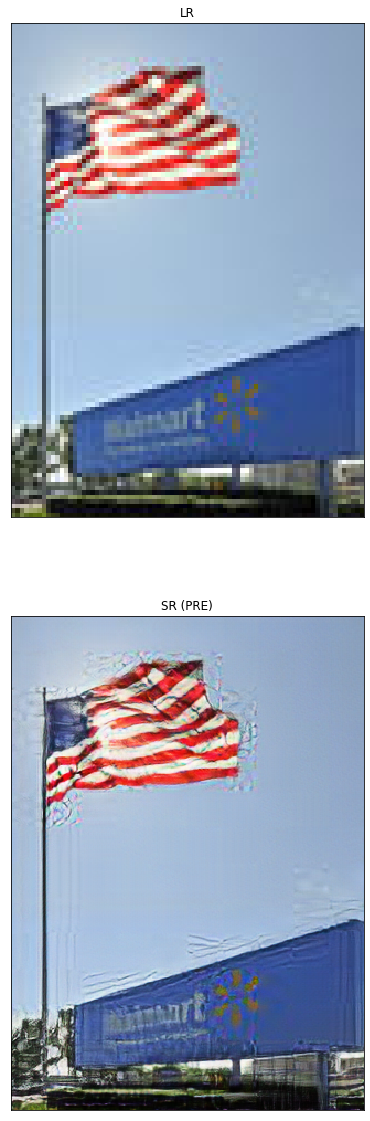

In [0]:
resolve_and_plot('/content/image69.jpg')


(61, 80, 3)
(244, 320, 3)


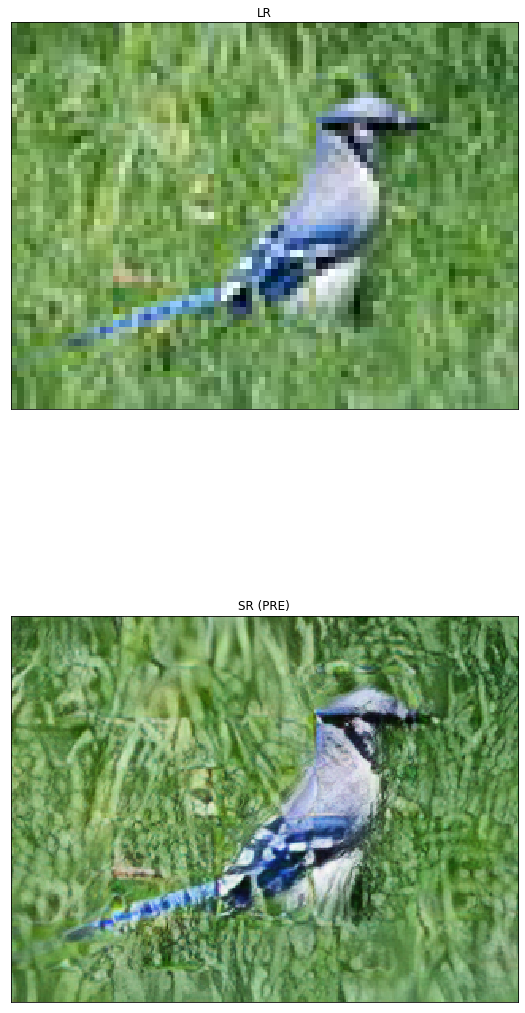

In [0]:
resolve_and_plot('/content/image30.jpg')
